<h1>Differential Privacy [HW 2 - Diabetes dataset]</h1>

I import the libraries needed for this homework:

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy.random as npr
from faker import Faker

<p>I read the dataset using pandas:

In [2]:
diabetes_ds = pd.read_csv("diabetes.csv")

# display dataset
diabetes_ds

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


Since this dataset has been "anonymized",  it does not contain PII. I have included additional fake information to make it more interesting (e.g., SSN):

In [3]:
name_list = []
ssn_list = []
job_list = []


# use italian locale
fake = Faker('it_IT')

# generate fake data for all entries
for _ in range(768):
    name_list.append(fake.name_female())
    ssn_list.append(fake.ssn())
    job_list.append(fake.job())
    
# add new columns to csv file
diabetes_ds['Name'] = name_list
diabetes_ds['SSN'] = ssn_list 
diabetes_ds['Job'] = job_list 

diabetes_ds = diabetes_ds[['Name', 'SSN', 'Age', 'Job', 'Pregnancies', 
                           'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 
                           'BMI', 'DiabetesPedigreeFunction', 'Outcome']]

# save the dataset
diabetes_ds.to_csv('output.csv')

I read the dataset to see how it changed from the previous dataset, which can be found on Kaggle:

In [4]:
# read new dataset
diabetes_dataset = pd.read_csv("output.csv")
diabetes_dataset.head()

,Unnamed: 0,Name,SSN,Age,Job,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Outcome
0,0,Dott. Rosina Perozzo,LDBTTN88M10D144M,50,Operational researcher,6,148,72,35,0,33.6,0.627,1
1,1,Graziella Franceschi,CMSGNG18A68A991V,31,"Engineer, technical sales",1,85,66,29,0,26.6,0.351,0
2,2,Iolanda Zito,FOSTN13R23E566Q,32,Information officer,8,183,64,0,0,23.3,0.672,1
3,3,Allegra Scaramucci,GRNLRZ69M54E588O,21,"Designer, industrial/product",1,89,66,23,94,28.1,0.167,0
4,4,Viridiana Canetta-Saraceno,VRGLSN75M19B076I,33,Energy manager,0,137,40,35,168,43.1,2.288,1


## Histograms

<AxesSubplot:xlabel='Age', ylabel='Count'>

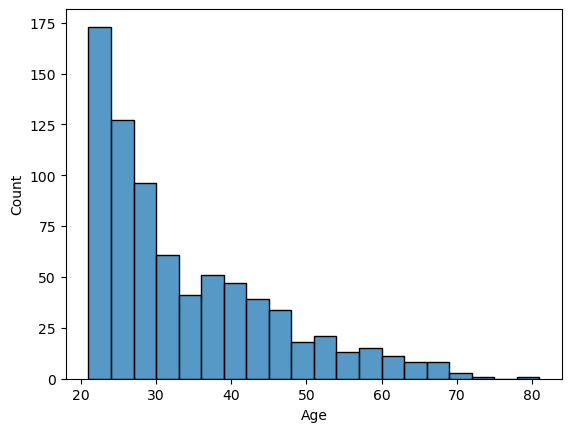

In [5]:
sns.histplot(data=diabetes_dataset, x='Age', bins=20)

<AxesSubplot:xlabel='Pregnancies', ylabel='Count'>

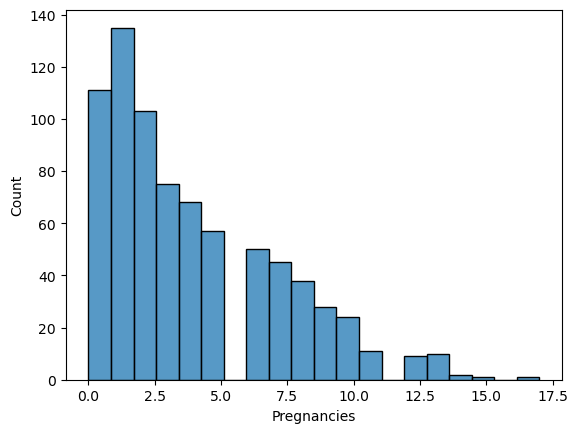

In [6]:
sns.histplot(data=diabetes_dataset, x='Pregnancies', bins=20)

### K-anonymity
Here, K-anonymity was implemented based on the definition we saw in the lecture. Basically, we are iterating over each row within our dataset and checking if they have the same value for quasi-identifiers. If the number is less than k, then it does not satisfy k-anonymity.

In [7]:
# Define k-anonymity function
def is_kanonymous(dataset, k_value):
  # Loop over each row in the table
  for idx, row in dataset.iterrows():
      query = ' & '.join([f'{col} == {row[col]}' for col in dataset.columns])
      rows = dataset.query(query)
      # If number is smaller than k, then it is false, else true
      if rows.shape[0] < k_value:
        return False
  return True

Now, we check to see if this dataset satisfies k-anonymity if k = 1:

In [8]:
diabetes_ds = pd.read_csv("diabetes.csv")

is_kanonymous(dataset=diabetes_ds, k_value=1)

True

As we discussed in the lectures, two values for k should be avoided: when k is equal to 1 and when it is equal to n (the dimension of the dataset). 

I will keep increasing the value for k to see if the result changes:

In [9]:
is_kanonymous(diabetes_ds, k_value=50)

False

It is false, which makes it problematic for us. We can perform generalization or suppression to achieve privacy.

### Generalization
We can use generalization as a method to try to achieve k-anonymity. But this has its own set of disadvantages. If we generalize too much, we will lose the data that made the dataset valuable in the first place:

In [10]:
def generalization_function(dataset, gen_degree):
    return dataset.apply(lambda element: element.apply(lambda target: int(int(target/(10**gen_degree[element.name]))*(10**gen_degree[element.name]))))

In [11]:
generalization_degree = {
    'Age': 1,
    'Pregnancies': 1,
    'Glucose': 1,
    'BloodPressure': 1,
    'SkinThickness': 1,
    'Insulin': 1,
    'BMI': 1,
    'DiabetesPedigreeFunction': 1,
    'Outcome': 1
}

Now I'll try to generalize by one:

In [12]:
generalization_function(diabetes_ds, generalization_degree)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,140,70,30,0,30,0,50,0
1,0,80,60,20,0,20,0,30,0
2,0,180,60,0,0,20,0,30,0
3,0,80,60,20,90,20,0,20,0
4,0,130,40,30,160,40,0,30,0
...,...,...,...,...,...,...,...,...,...
763,10,100,70,40,180,30,0,60,0
764,0,120,70,20,0,30,0,20,0
765,0,120,70,20,110,20,0,30,0
766,0,120,60,0,0,30,0,40,0


In [13]:
is_kanonymous(generalization_function(diabetes_ds, generalization_degree), 2)

False

I have to increase the degree of generalization to achieve privacy, meaning I will lose a large amount of information.

In [14]:
generalization_degree = {
    'Age': 2,
    'Pregnancies': 3,
    'Glucose': 3,
    'BloodPressure': 2,
    'SkinThickness': 2,
    'Insulin': 3,
    'BMI': 2,
    'DiabetesPedigreeFunction': 2,
    'Outcome': 2
}

generalization_function(diabetes_ds, generalization_degree)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
763,0,0,0,0,0,0,0,0,0
764,0,0,0,0,0,0,0,0,0
765,0,0,0,0,0,0,0,0,0
766,0,0,0,0,0,0,0,0,0


In [15]:
is_kanonymous(generalization_function(diabetes_ds, generalization_degree), 2)

True

### Distributional Queries
As a distribution query, we could try to understand how many individuals within the dataset have a BMI over 50:

In [16]:
diabetes_ds[diabetes_ds["Age"] >= 60].shape[0]

32

Another possible query: how many individuals have been pregnant more than five times?

In [17]:
diabetes_ds[diabetes_ds["Pregnancies"] > 5].shape[0]

219

### DP: Laplace Mechanism
Differential privacy is a framework, and we have different mechanisms to achieve differential privacy. One mechanism is the Laplace mechanism, which adds noise drawn from the Laplace distribution to the query.

In [18]:
diabetes_ds[diabetes_ds["BMI"] >= 60].shape[0]

1

In the following example, I use a value for epsilon that is close to 1, so the output will not be too far from the original value:

In [19]:
# Laplace mechanism definition:
# F(x) = f(x) + Lap(s/eps)
# s: sensitivity
# eps: privacy budget

sensitivity = 1
eps = 0.8

diabetes_ds[diabetes_ds["BMI"] >= 60].shape[0] + npr.laplace(scale=sensitivity/eps)

4.01561100011624

By modifying the privacy budget, we can see how the final output changes. The smaller the epsilon, the more privacy we will have, implying that the final value will be further away from the original value.

In [20]:
sensitivity = 1
eps = 0.001

diabetes_ds[diabetes_ds["BMI"] >= 60].shape[0] + npr.laplace(scale=sensitivity/eps)

112.36110714442626

### Using Laplace for Histograms

In [21]:
# reset dataset

diab_ds = pd.read_csv("output.csv")

In [22]:
# choose variable glucose and count how many individuals have the same values
hist_diabetes = diab_ds["BloodPressure"].value_counts()

# display
hist_diabetes.to_frame().head(11)

,BloodPressure
70,57
74,52
78,45
68,45
72,44
64,43
80,40
76,39
60,37
0,35


I can use the Laplace mechanism to add noise to the histogram:

In [23]:
sensitivity = 1
eps = 0.03

lap_noise = lambda x: x + npr.laplace(scale=sensitivity/eps)

hist_noise_added = hist_diabetes.apply(lap_noise)

# noisy table
hist_noise_added.to_frame().head()

,BloodPressure
70,67.141374
74,173.475900
78,31.171421
68,78.686436
72,-1.391665


### Using Laplace for Contingency tables

I can use multiple variables instead of the one we used previously (BloodPressure):

In [24]:
# reset to my custom dataset
diab_ds = pd.read_csv("output.csv")

In [25]:
contingency_table = pd.crosstab([diab_ds["Job"], diab_ds["Age"]], diab_ds['Outcome'])

# display contingency table
contingency_table

Outcome                                   0  1
Job                                  Age      
Accommodation manager                31   1  0
Accountant, chartered                52   0  1
Accountant, chartered public finance 40   1  0
                                     51   1  0
Accounting technician                26   1  0
...                                      .. ..
Water quality scientist              25   1  0
Wellsite geologist                   21   1  0
Writer                               31   1  1
                                     32   0  1
Youth worker                         41   1  0

[744 rows x 2 columns]

I'll add noise to the contingency table:

In [26]:
# define privacy budget which is large
eps = 50

noisy_contingency_table = contingency_table.apply(lap_noise)

# display
noisy_contingency_table

Outcome                                          0         1
Job                                  Age                    
Accommodation manager                31   0.996547 -0.018223
Accountant, chartered                52  -0.003453  0.981777
Accountant, chartered public finance 40   0.996547 -0.018223
                                     51   0.996547 -0.018223
Accounting technician                26   0.996547 -0.018223
...                                            ...       ...
Water quality scientist              25   0.996547 -0.018223
Wellsite geologist                   21   0.996547 -0.018223
Writer                               31   0.996547  0.981777
                                     32  -0.003453  0.981777
Youth worker                         41   0.996547 -0.018223

[744 rows x 2 columns]

In [27]:
# privacy budget chosen to be small
eps = 0.0005 

noisy_contingency_table = contingency_table.apply(lap_noise)

# display
noisy_contingency_table

Outcome                                             0            1
Job                                  Age                          
Accommodation manager                31   5295.641254  3268.614826
Accountant, chartered                52   5294.641254  3269.614826
Accountant, chartered public finance 40   5295.641254  3268.614826
                                     51   5295.641254  3268.614826
Accounting technician                26   5295.641254  3268.614826
...                                               ...          ...
Water quality scientist              25   5295.641254  3268.614826
Wellsite geologist                   21   5295.641254  3268.614826
Writer                               31   5295.641254  3269.614826
                                     32   5294.641254  3269.614826
Youth worker                         41   5295.641254  3268.614826

[744 rows x 2 columns]

It can be observed that, when the chosen value for epsilon is small, the output value changes drastically and is very far from the original value. This creates issues for doctors, who need precise data to decide which operation must be performed on the patient.